<a href="https://colab.research.google.com/github/620593/ML/blob/main/Ridge_and_Lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [7]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [8]:
df=df.dropna().reset_index(drop=True)

In [9]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [11]:
df=df.drop(122).reset_index(drop=True)

In [12]:
df.columns = df.columns.str.strip()

In [13]:
objects = [features for features in df.columns if df[features].dtypes=='O']

In [14]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [15]:
for i in objects:
  if i!='Classes':
    df[i]=df[i].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(14), object(1)
memory usage: 28.6+ KB


In [17]:
df.to_csv('/content/Algerian_forest_fires_dataset_Cleaned.csv')

## Exploratory Data Analysis

In [18]:
df_copy = df

In [19]:
df=df_copy

In [20]:
df=df.drop(['day','month','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [21]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [22]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [23]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

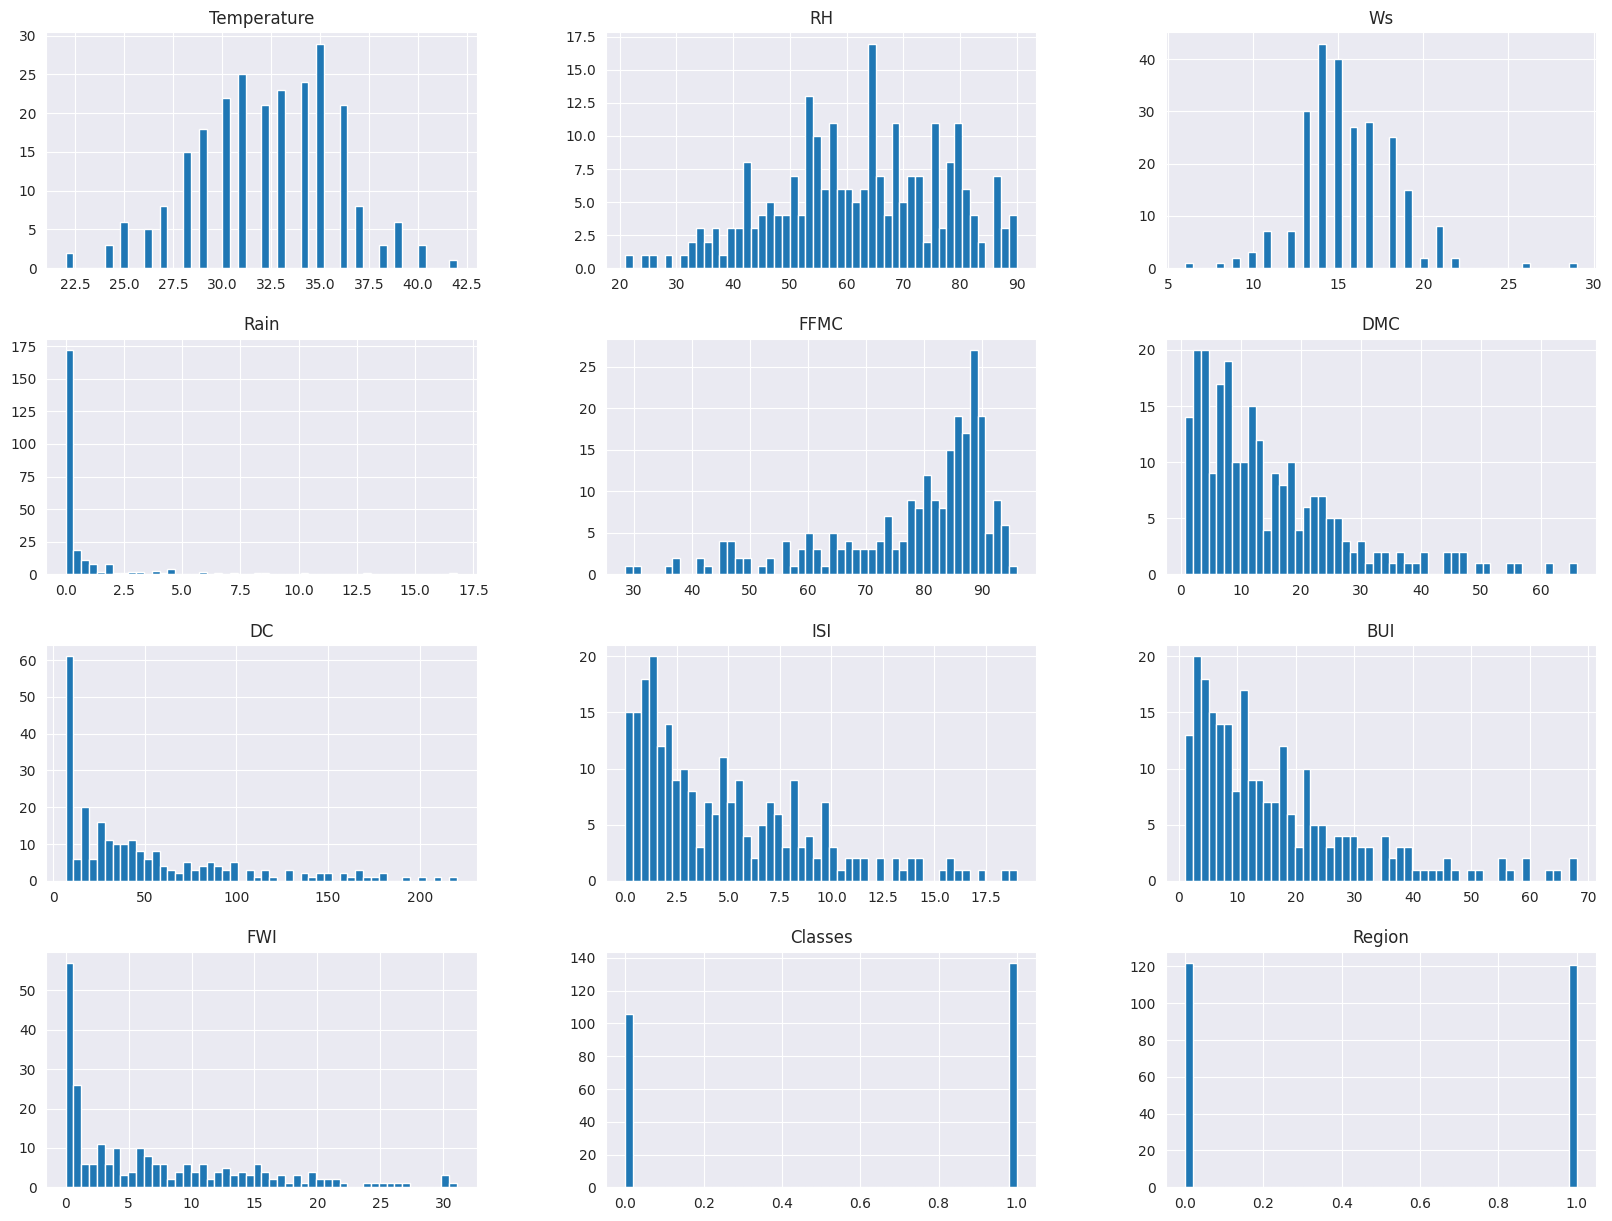

In [24]:
sns.set_style('darkgrid')
df.hist(bins=50,figsize=(20,15))

In [25]:
percentage=df['Classes'].value_counts(normalize=True)*100

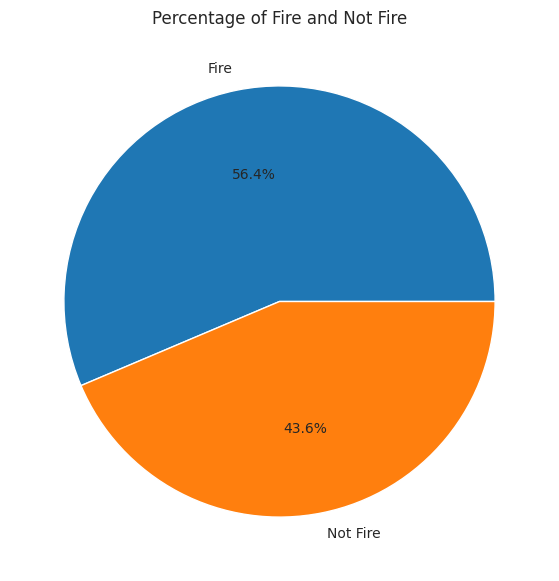

In [26]:
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Percentage of Fire and Not Fire')
plt.show()

<Axes: >

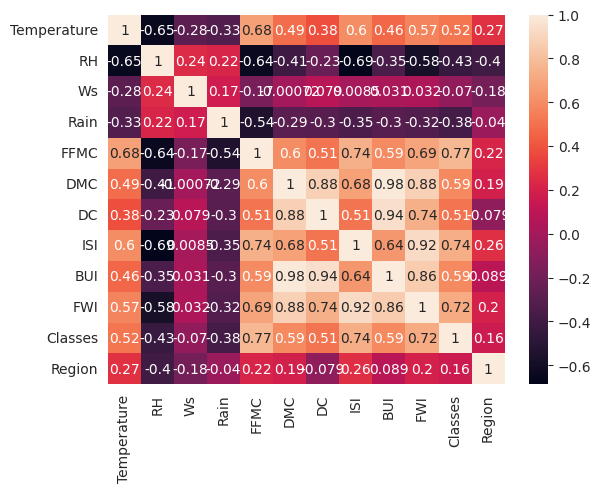

In [27]:
sns.heatmap(df.corr(),annot=True)

In [28]:
df,df_copy=df_copy,df

In [29]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

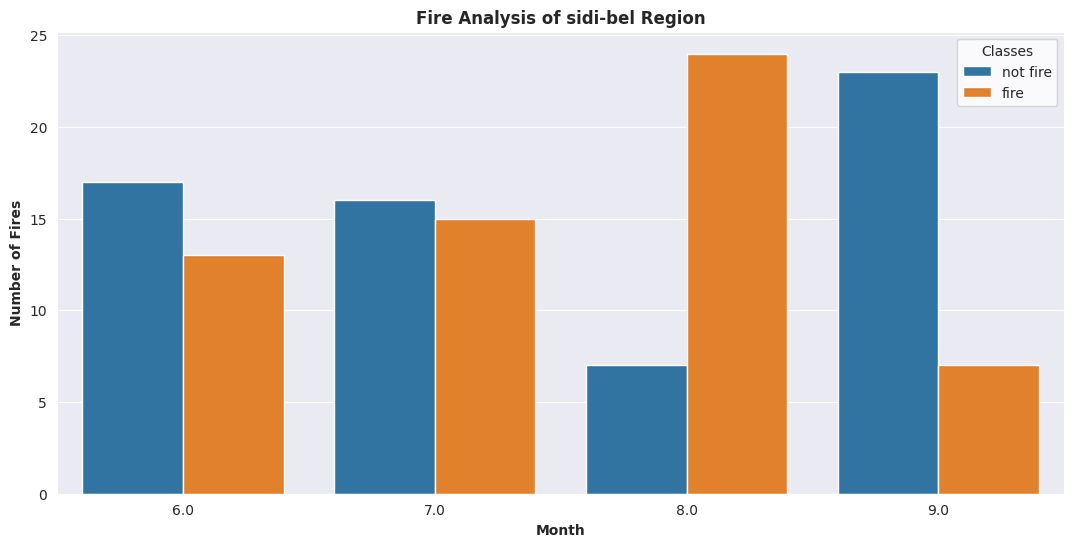

In [30]:
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Month',weight='bold')
plt.title('Fire Analysis of sidi-bel Region',weight='bold')
plt.show()

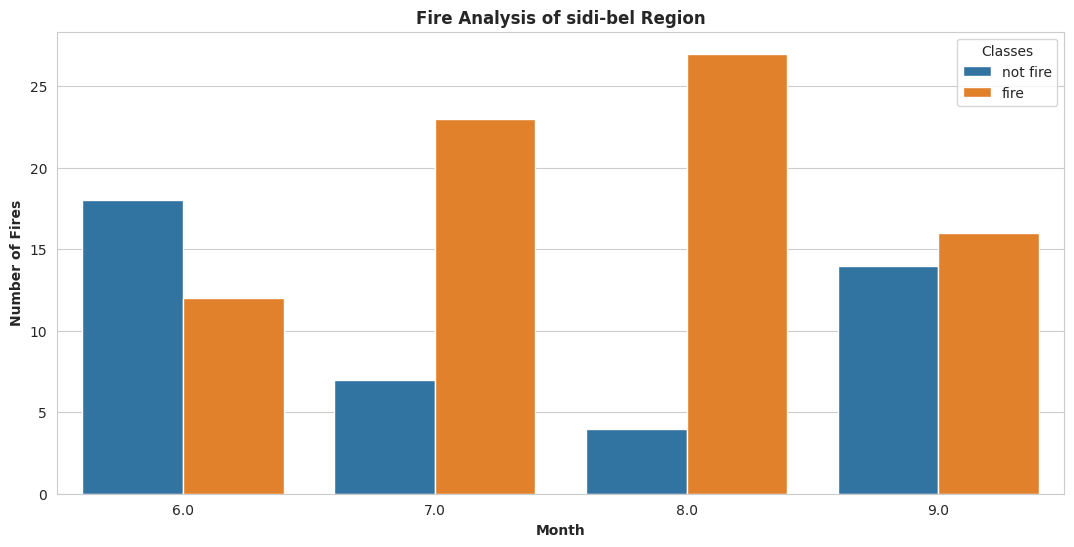

In [31]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Month',weight='bold')
plt.title('Fire Analysis of sidi-bel Region',weight='bold')
plt.show()

## model Training

In [75]:
df=pd.read_csv('/content/Algerian_forest_fires_dataset_Cleaned.csv')


In [76]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [77]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [78]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [79]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [80]:
x


,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,1,1.0
239,239,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0,1.0
240,240,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0,1.0
241,241,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0,1.0


In [81]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [82]:
##Train test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [83]:
x_train.shape,x_test.shape

((182, 12), (61, 12))

In [84]:
## Feature selection based on the correlation
x_train.corr()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Unnamed: 0,1.000000,0.238838,-0.402771,-0.139058,-0.062277,0.258222,0.245547,0.052076,0.319078,0.172930,0.205829,0.873280
Temperature,0.238838,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299,0.296033
RH,-0.402771,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906,-0.427696
Ws,-0.139058,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246,-0.191245
Rain,-0.062277,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221,-0.086938
FFMC,0.258222,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444,0.267099
DMC,0.245547,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505,0.175711
DC,0.052076,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431,-0.080660
ISI,0.319078,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764,0.312299
BUI,0.172930,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037,0.079373


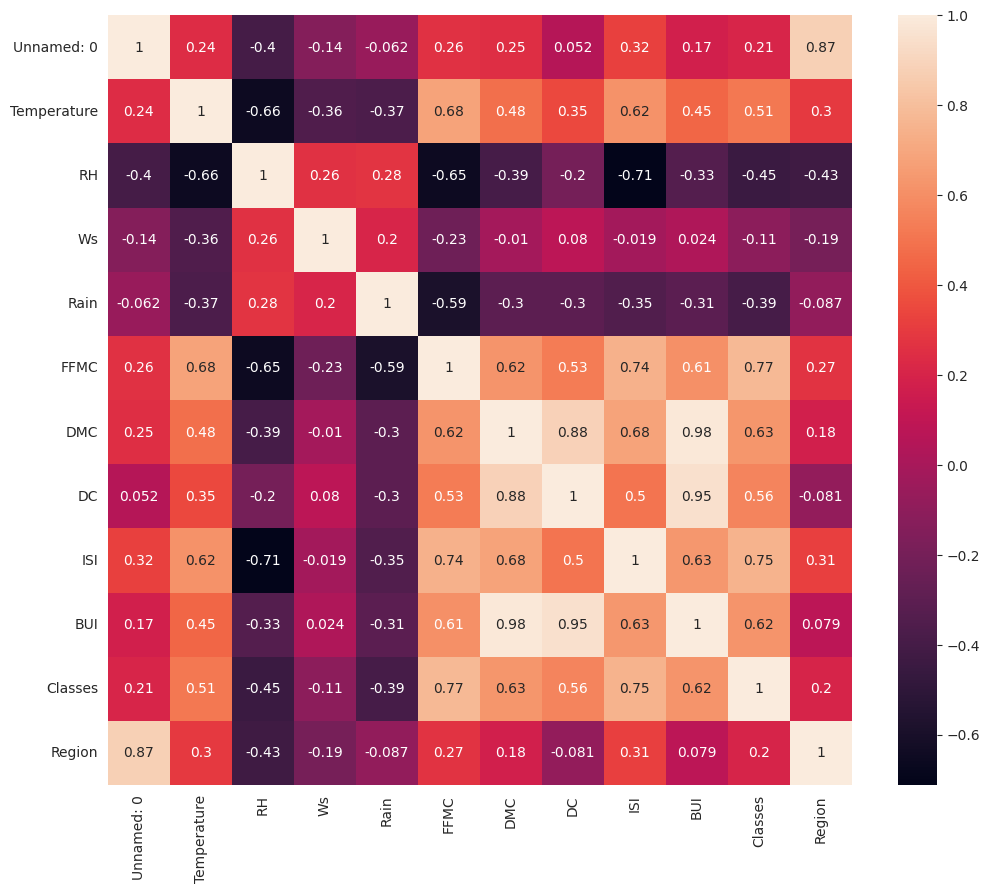

In [85]:
## check for multicollinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [86]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [87]:
corr_features=correlation(x_train,0.85)

In [88]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

## Feature Scaling


In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

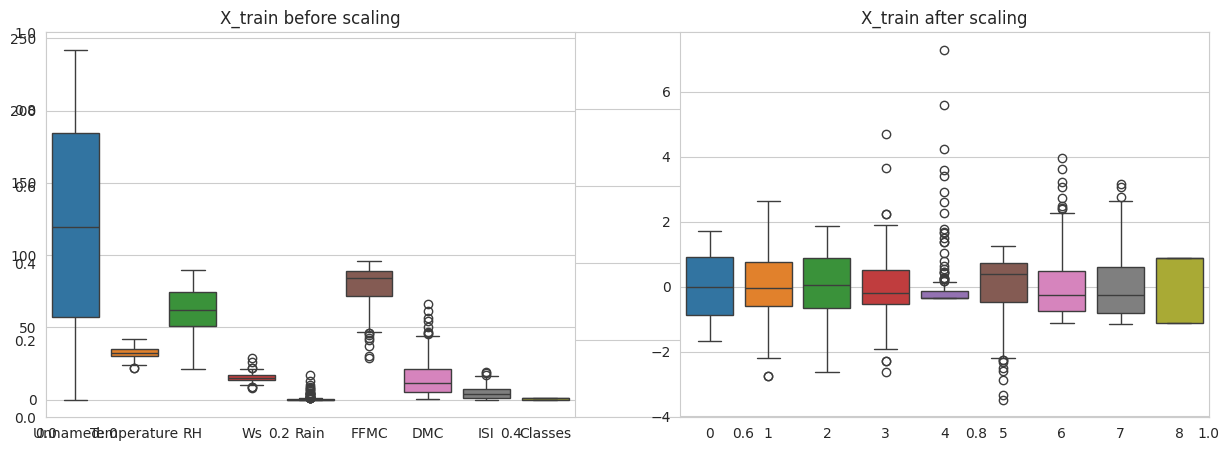

In [90]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train after scaling')
plt.show()


R2 Score  0.9675970701870706
mean absolute error  0.7287739367746134


Text(0, 0.5, 'Predicted')

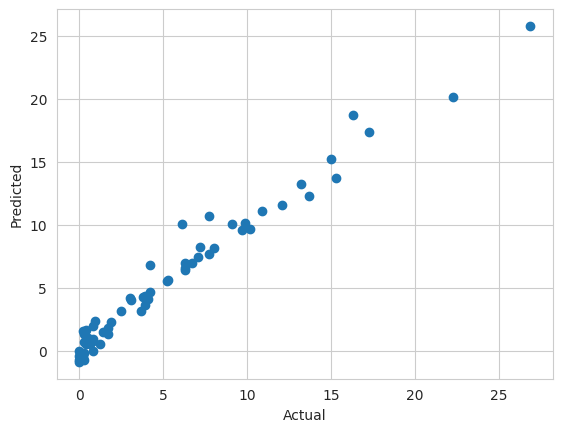

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
print("R2 Score ",r2_score(y_test,y_pred))
print("mean absolute error ",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


## Lasso Regression

R2 Score  0.9376608618583483
mean absolute error  1.1209176317539564


Text(0, 0.5, 'Predicted')

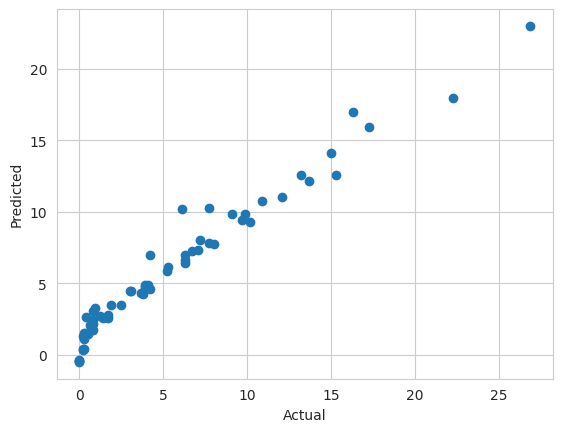

In [93]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
print("R2 Score ",r2_score(y_test,y_pred))
print("mean absolute error ",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Lasso Crossvalidation

In [99]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)



LassoCV(cv=5)

R2 Score  0.9677353340592109
mean absolute error  0.7206546891032921


Text(0, 0.5, 'Predicted')

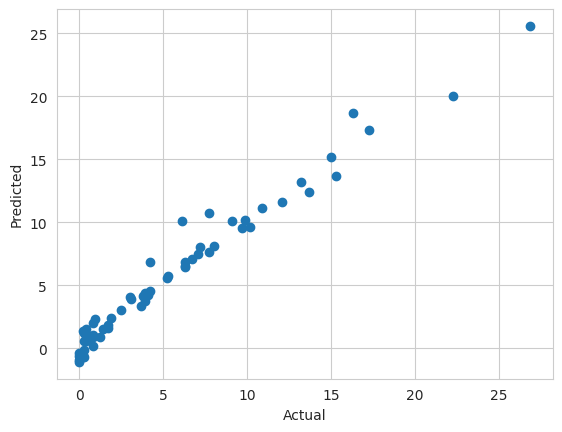

In [100]:
lassocv.fit(x_train_scaled,y_train)
y_pred=lassocv.predict(x_test_scaled)
print("R2 Score ",r2_score(y_test,y_pred))
print("mean absolute error ",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

R2 Score  0.9663713473482051
mean absolute error  0.756112522627409


Text(0, 0.5, 'Predicted')

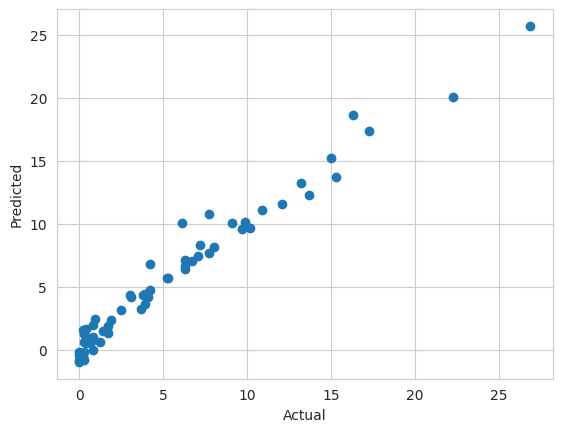

In [96]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
print("R2 Score ",r2_score(y_test,y_pred))
print("mean absolute error ",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

R2 Score  0.9663713473482051
mean absolute error  0.756112522627409


Text(0, 0.5, 'Predicted')

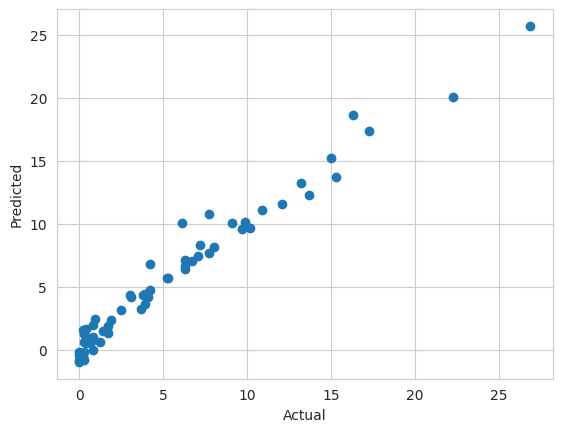

In [101]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_absolute_error
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
print("R2 Score ",r2_score(y_test,y_pred))
print("mean absolute error ",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## Elastic net


R2 Score  0.8575524379493602
mean absolute error  1.8193547186594632


Text(0, 0.5, 'Predicted')

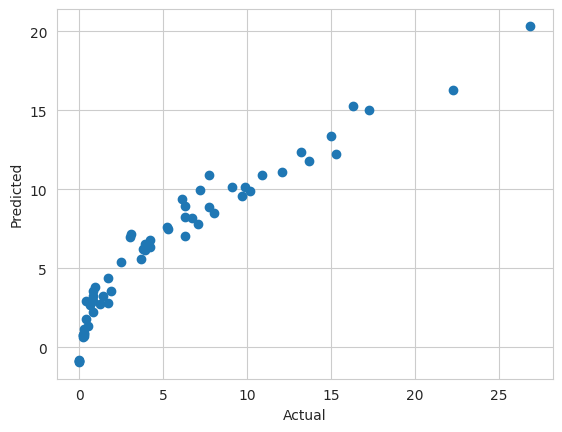

In [97]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
elasticnet=ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred=elasticnet.predict(x_test_scaled)
print("R2 Score ",r2_score(y_test,y_pred))
print("mean absolute error ",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

R2 Score  0.9626844739482164
mean absolute error  0.8246166846254305


Text(0, 0.5, 'Predicted')

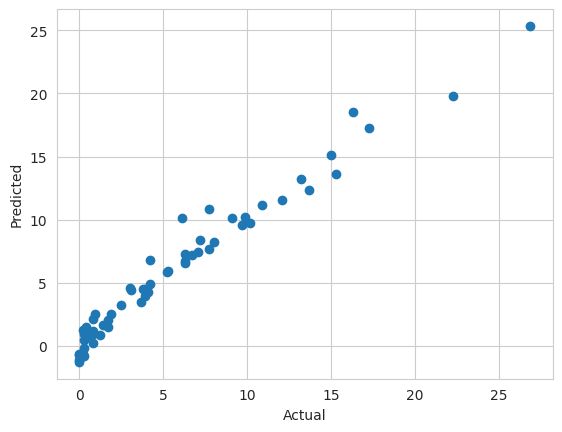

In [102]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,mean_absolute_error
elasticnet=ElasticNetCV()
elasticnet.fit(x_train_scaled,y_train)
y_pred=elasticnet.predict(x_test_scaled)
print("R2 Score ",r2_score(y_test,y_pred))
print("mean absolute error ",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')